In [1]:
from torch_geometric.datasets import Planetoid

local_data_root = '/Users/hl.zuo/Documents/Yale course/Yale independent project/GraphTransformer/DatasetVis/data/'

# dataset = Planetoid(root='/tmp/Cora', name='Cora')
dataset = Planetoid(root=local_data_root + 'cora', name='Cora')

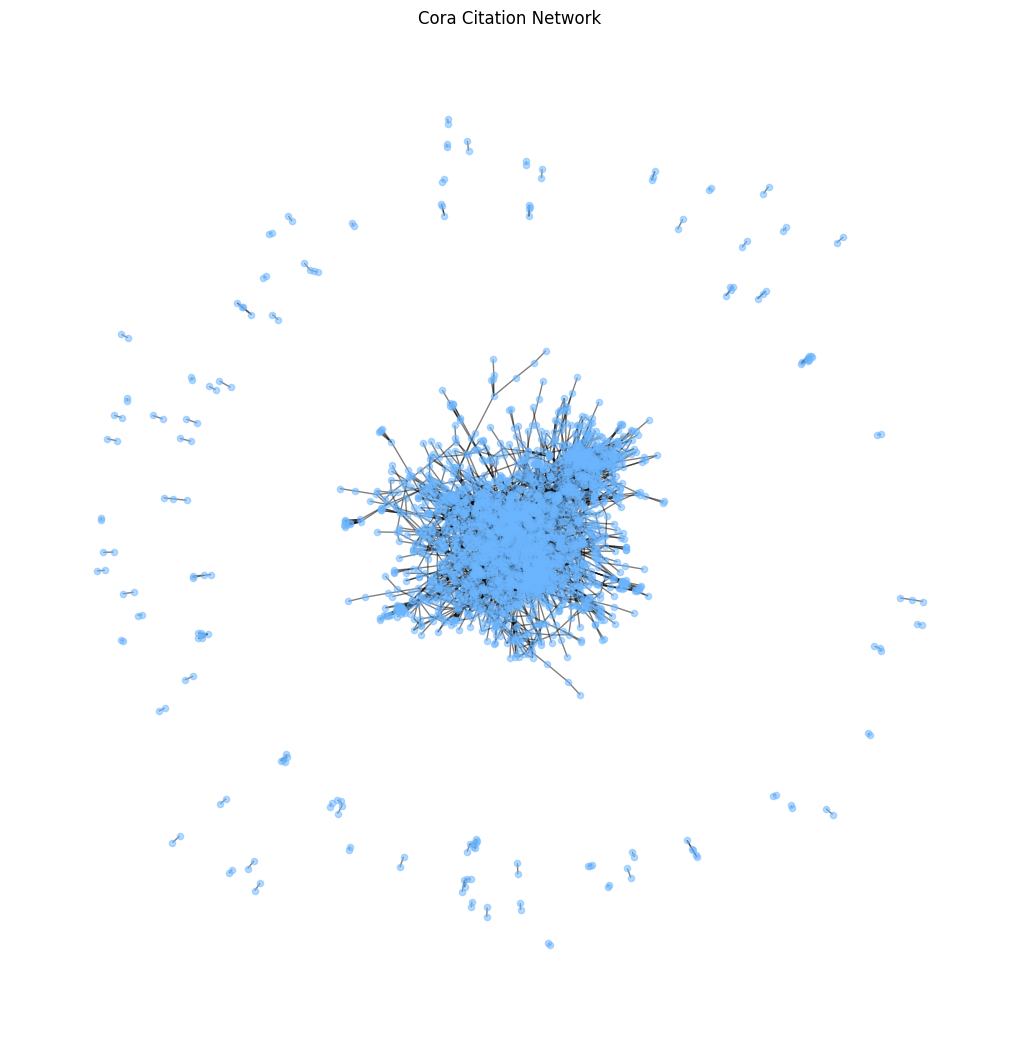

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Convert to networkx graph
graph = to_networkx(dataset[0], to_undirected=True)

# Draw the graph
plt.figure(figsize=(10, 10))
# nx.draw(graph, node_size=20, node_color="blue", alpha=0.5)
# 浅蓝色
nx.draw(graph, node_size=20, node_color="#6CB6FF", alpha=0.5)
plt.title("Cora Citation Network")
plt.show()


In [6]:
from torch_geometric.datasets import Reddit
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

# Download dataset
reddit_data = Reddit(root=local_data_root + 'reddit')

# Convert to networkx graph
reddit_graph = to_networkx(reddit_data[0], to_undirected=True)

# Draw a subgraph for illustration (Reddit is too large to visualize entirely)
subgraph = nx.subgraph(reddit_graph, range(0, 200))
plt.figure(figsize=(10, 10))
nx.draw(subgraph, node_size=20, node_color="#6CB6FF", alpha=0.5)
plt.title("Reddit Social Network (Subgraph)")
plt.show()


Extracting /Users/hl.zuo/Documents/Yale course/Yale independent project/GraphTransformer/DatasetVis/data/reddit/raw/reddit.zip
Processing...
Done!


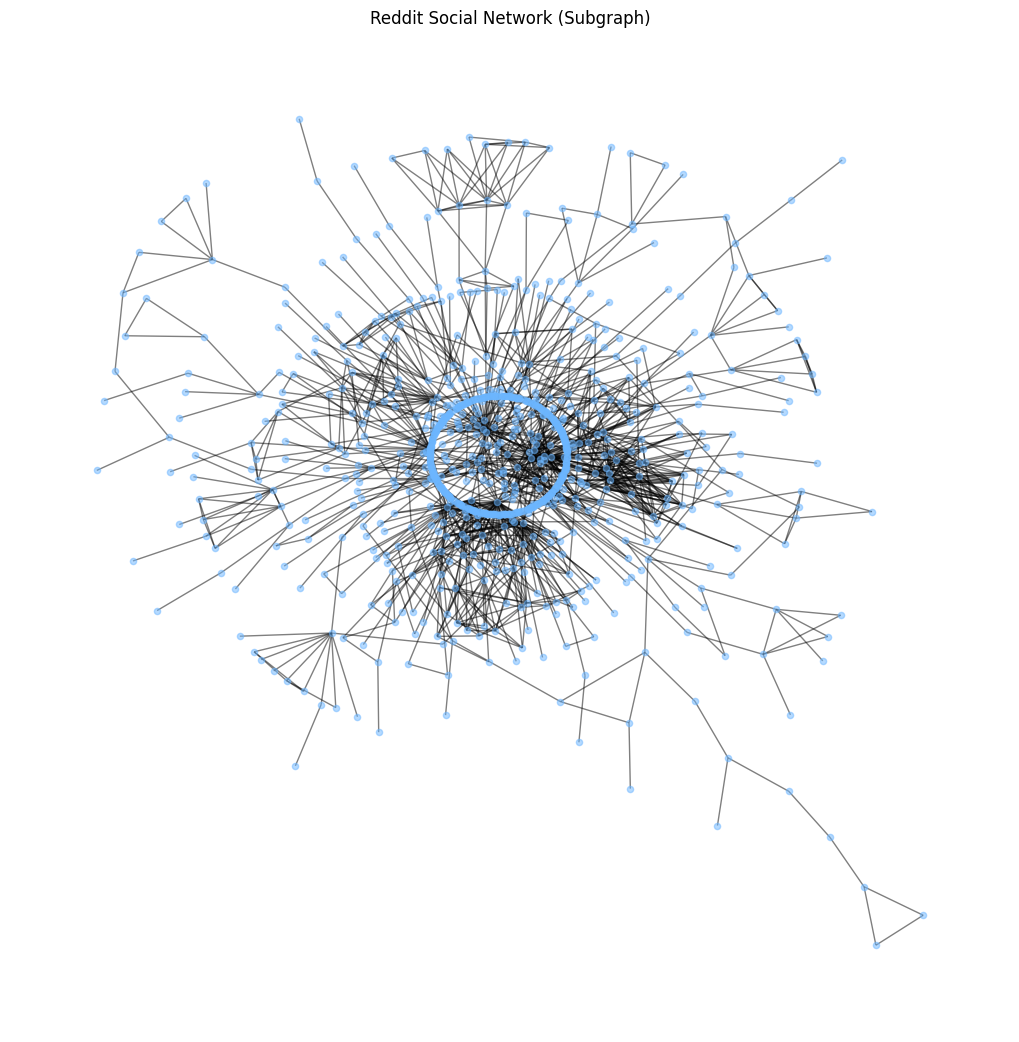

In [7]:
from torch_geometric.datasets import Reddit
import torch_geometric
import torch
import networkx as nx
import matplotlib.pyplot as plt

# 下载 Reddit 数据集
reddit_data = Reddit(root=local_data_root + 'reddit')

# 截取前 200 个节点以及相应的边
thre = 1000
subgraph_nodes = torch.arange(0, thre)  # 前200个节点
subgraph_edge_index = reddit_data[0].edge_index
mask = (subgraph_edge_index[0] < thre) & (subgraph_edge_index[1] < thre)  # 仅考虑在前200个节点之间的边
subgraph_edge_index = subgraph_edge_index[:, mask]

# 创建一个新的 PyTorch Geometric 数据对象
subgraph_data = torch_geometric.data.Data(edge_index=subgraph_edge_index)

# 转换为 networkx 图
subgraph_nx = to_networkx(subgraph_data, to_undirected=True)

# 可视化子图
plt.figure(figsize=(10, 10))
nx.draw(subgraph_nx, node_size=20, node_color="#6CB6FF", alpha=0.5, pos=nx.kamada_kawai_layout(subgraph_nx))
plt.title("Reddit Social Network (Subgraph)")
plt.show()


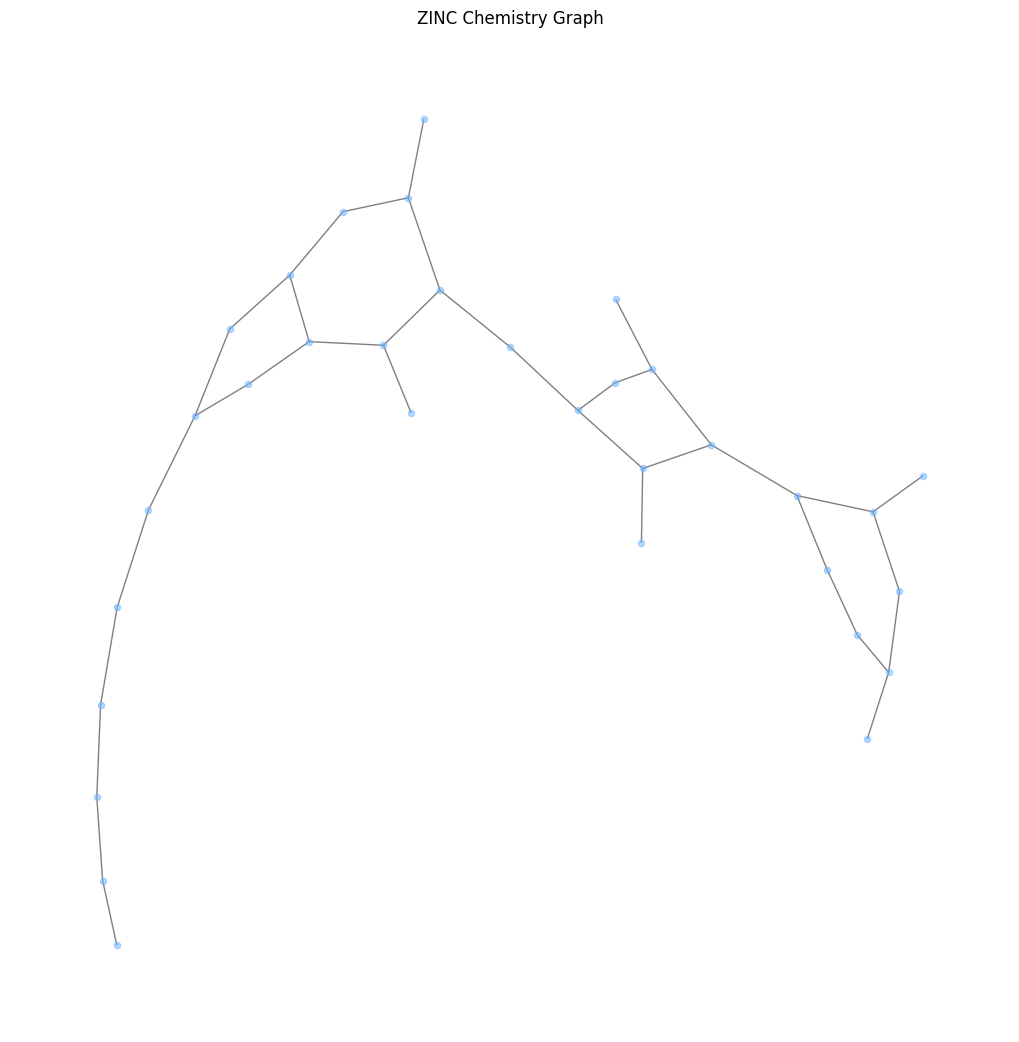

In [4]:
from torch_geometric.datasets import ZINC
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

# Download dataset
zinc_data = ZINC(root=local_data_root + 'zinc')

# Convert to networkx graph
zinc_graph = to_networkx(zinc_data[0], to_undirected=True)

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(zinc_graph, node_size=20, node_color="#6CB6FF", alpha=0.5)
plt.title("ZINC Chemistry Graph")
plt.show()


Extracting /Users/hl.zuo/Documents/Yale course/Yale independent project/GraphTransformer/DatasetVis/data/ppi/ppi.zip
Processing...
Done!


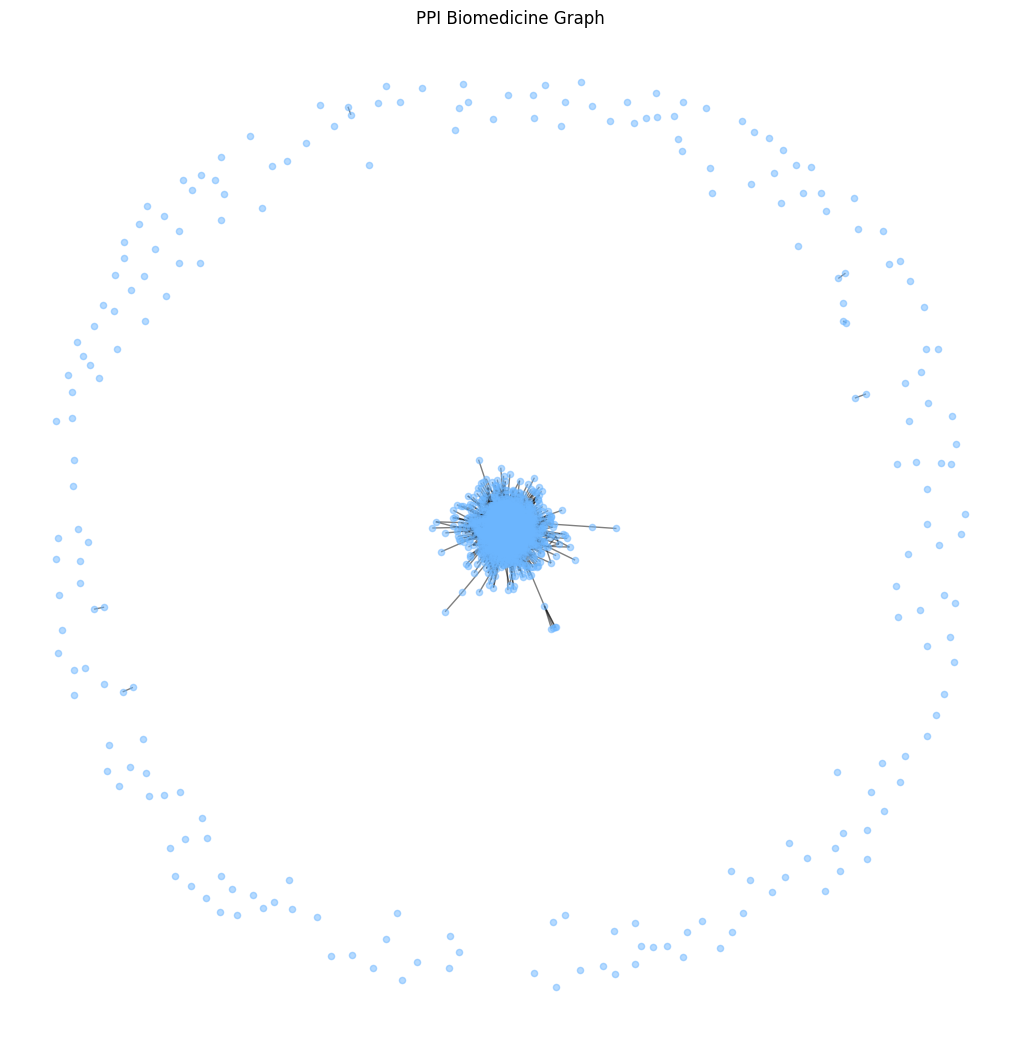

In [5]:
from torch_geometric.datasets import PPI
from torch_geometric.utils import to_networkx

# Download dataset
ppi_data = PPI(root=local_data_root + 'ppi')

# Convert to networkx graph
ppi_graph = to_networkx(ppi_data[0], to_undirected=True)

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(ppi_graph, node_size=20, node_color="#6CB6FF", alpha=0.5, pos=nx.spring_layout(ppi_graph))
plt.title("PPI Biomedicine Graph")
plt.show()
